In [1]:
"""
PIB Estadual (valor adicionado a preços básicos) - indústria - extrativa (preços de 2010)
Fonte: Instituto Brasileiro de Geografia e Estatística
Frequência: Anual de 1985 até 2022
Unidade: R$ (mil), a preços do ano 2010 ( )

Comentário: O produto interno bruto (PIB) é o total dos bens e serviços produzidos pelas
unidades produtoras residentes destinados ao consumo final, sendo equivalente à soma dos 
valores adicionados pelas diversas atividades econômicas acrescida dos impostos, líquidos 
de subsídios, sobre produtos. Equivale também à soma dos consumos finais de bens e serviços 
valorados a preço de mercado, sendo também equivalente à soma das rendas primárias. Neste caso 
é a medição do PIB de um determinado Estado. Valor adicionado bruto é o valor que a atividade 
agrega aos bens e serviços consumidos no seu processo produtivo. O setor indústria refere-se 
ao cálculo do PIB pela ótica contábil da produção. A atividade indústria extrativa compreende 
as atividades de extração de minerais em estado natural: sólidos (carvão e outros minérios), 
líquidos (petróleo cru) e gasosos (gás natural), podendo realizar-se em minas subterrâneas, a 
céu aberto ou em poços. Fontes: Para 2002-2006: Sistema de Contas Regionais Referência 2002. 
Para 1985-2001: Antigo Sistema de Contas Regionais. Conceito utilizado a partir de 1985 a 
preços básicos. Mais Informações: CNAE 2.0; Contas Nacionais número 6, Contas Regionais do 
Brasil 1999; Sistema de Contas Nacionais Brasil Conceitos, 3a Edição, 2010; 
"Contabilidade Social" Feijo, Carmem & Ramos, Roberto, 4a edição, 2013, Ed. Campus, 
Rio de Janeiro.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from collections import Counter

In [2]:
pib_extrat_data = pd.read_csv("data/ipeadata_clean_extrat.csv", sep=";")

pib_extrat_data

,Sigla,Código,Estado,1985,1986,1987,1988,1989,1990,1991,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 41
0,AC,12,Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2808,6943914145","2422,3295413919","1461,4148869849","977,7406564434","2656,2156162222","2364,955872924","1116,0242759102","1061,21095469755","-38,1900580831739",NaN
1,AL,27,Alagoas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"283134,851674151","186348,944367186","67548,6029938813","87996,9329301169","118036,469824274","132237,662354064","89928,1689211536","173514,194087724","298761,282478108",NaN
2,AM,13,Amazonas,"1692625,07811989","900169,079391474","1346066,78902212","1524672,49752768","1459649,18502107","341247,673527044","430249,01302782",...,"1515981,21670733","1023932,86403073","208885,121877403","274055,002491868","810038,617004796","913379,255244683","624834,523828441","1194326,8394819","1579985,66710318",NaN
3,AP,16,Amapá,"353122,910058793","282421,648829941","166320,884052502","124221,593767332","109571,191443065","104259,860032705","91878,3457566574",...,"52271,0467769009","15501,6226384453","20575,630812158","18158,2071592128","12156,6847028379","1476,6784542891","5559,9050810839","2866,50632617817","-5353,08521148605",NaN
4,BA,29,Bahia,"6272900,60214583","4738824,67584331","3453641,60350669","3158527,95054939","2556413,6006847","2166578,12247534","2376780,54701128",...,"2716285,96524515","1747507,16148238","805468,142031164","1264546,90614502","1925598,53891646","1714819,22941723","1529597,65061782","2687409,14308756","2791968,09279781",NaN
5,CE,23,Ceará,"1996198,90919238","1416247,33119598","852025,998448137","736230,50731501","602180,196056037","551911,635282059","659945,834678811",...,"436237,314030804","232252,168928526","123258,526268341","221209,665300376","246725,981713629","238542,23731538","152650,940677484","256832,783610588","144535,557629205",NaN
6,DF,53,Distrito Federal,"24793,5194623453","20648,0837584619","16225,4505626425","15160,9422272889","11954,6439495544","11388,6785088856","12276,0744632031",...,"16085,9400007792","9967,5824360592","15251,7416766074","5428,9108242751","12255,054223896","13454,7122035858","5305,3294306175","16075,9026536373","16127,8891612584",NaN
7,ES,32,Espírito Santo,"1260942,53718013","993316,020092898","725629,865109265","647583,837557795","493852,770829157","418511,918901639","506069,458145844",...,"18847069,4307652","8950846,49376591","2835414,11162291","3536556,93724972","10126244,0029341","6380634,21080829","5940157,55121427","13546825,8542167","7675185,95829739",NaN
8,GO,52,Goiás,"460273,480362539","321001,453476239","115440,55635888","34478,016054183","37886,5065037751","49950,7433716999","90726,1203506679",...,"706715,614365488","717953,558057909","434859,549745966","616315,422743828","777502,042397522","727030,853332404","656810,487374384","977227,822126828","449372,594148669",NaN
9,MA,21,Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"381668,526053234","377556,647510126","113993,972557345","127837,264720905","325059,426344124","706168,1145745","1162960,02614016","1664999,24485926","618474,149057079",NaN


In [3]:
# Valores nulos
pib_extrat_transposed = pib_extrat_data.T.drop(index=['Sigla', 'Código'])
pib_extrat_transposed.columns = pib_extrat_transposed.loc['Estado']
pib_extrat_transposed.drop(index=['Estado'], inplace=True)
pib_extrat_transposed.drop(index=['Unnamed: 41'], inplace=True)
pib_extrat_transposed = pib_extrat_transposed.loc['1989':]
pib_extrat_transposed.index = [int(i) for i in pib_extrat_transposed.index]
pib_extrat_transposed.rename_axis("Ano", axis=1, inplace=True)
pib_extrat_transposed.replace(',', '.', regex=True, inplace=True)
pib_extrat_transposed = pib_extrat_transposed.astype('float64')
pib_extrat_transposed


Ano,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
1989,NaN,NaN,1.459649e+06,109571.191443,2.556414e+06,602180.196056,11954.643950,4.938528e+05,3.788651e+04,NaN,...,66838.823495,1.139281e+07,1.238988e+06,129268.377514,NaN,244214.097684,329315.478405,1.163871e+06,1.438035e+05,NaN
1990,NaN,NaN,3.412477e+05,104259.860033,2.166578e+06,551911.635282,11388.678509,4.185119e+05,4.995074e+04,NaN,...,48551.148438,1.164317e+07,1.271888e+06,99930.660494,NaN,220780.070217,190075.521730,1.039839e+06,1.132790e+05,NaN
1991,NaN,NaN,4.302490e+05,91878.345757,2.376781e+06,659945.834679,12276.074463,5.060695e+05,9.072612e+04,NaN,...,52410.078723,1.445480e+07,1.736125e+06,106997.207055,NaN,226040.844985,172955.404233,1.308642e+06,1.376509e+05,NaN
1992,NaN,NaN,3.026730e+05,106662.766995,2.449666e+06,696916.205495,11668.035647,4.518986e+05,1.233944e+05,NaN,...,51037.697577,1.438461e+07,1.861391e+06,148384.945583,NaN,167087.019296,130951.986130,1.329841e+06,1.129303e+05,NaN
1993,NaN,NaN,3.429993e+05,132370.604882,2.828392e+06,694182.688340,13300.935554,5.176014e+05,1.991337e+05,NaN,...,49423.542452,1.723056e+07,2.184571e+06,186783.653008,NaN,154930.323587,137248.459032,1.705018e+06,1.278991e+05,NaN
1994,NaN,NaN,9.553637e+04,126138.473285,2.357919e+06,565032.474975,11791.696419,4.587296e+05,2.018344e+05,NaN,...,41480.848960,1.527219e+07,1.700680e+06,117762.543281,NaN,150529.408168,124763.327318,1.313809e+06,1.259161e+05,NaN
1995,NaN,NaN,6.410119e+04,102414.871534,1.630684e+06,375507.581994,8916.984022,3.345812e+05,1.004337e+05,NaN,...,40103.376363,1.122066e+07,1.055007e+06,68588.215580,NaN,150179.499423,88844.514410,8.727003e+05,9.474935e+04,NaN
1996,NaN,NaN,6.119113e+04,100307.419747,1.371703e+06,341772.983236,8857.879897,3.202500e+05,8.416547e+04,NaN,...,32009.495714,1.137589e+07,1.080913e+06,69871.666874,NaN,131121.654613,78392.013466,8.025992e+05,8.499721e+04,NaN
1997,NaN,NaN,5.610234e+04,110547.954752,1.313400e+06,363716.873803,10165.280628,3.324300e+05,1.061751e+05,NaN,...,32388.557759,1.298462e+07,1.175625e+06,78356.940273,NaN,141800.256336,104051.328272,9.670349e+05,9.600649e+04,NaN
1998,NaN,NaN,3.862465e+05,16750.836910,1.232215e+06,353328.782753,11722.156675,3.778430e+05,8.488741e+04,NaN,...,22974.407202,8.179930e+06,4.587884e+05,75165.251262,NaN,122659.177577,94453.856282,9.051830e+05,8.763521e+04,NaN


In [4]:
max_null_year = pib_extrat_transposed.loc[pib_extrat_transposed.isna().any(axis=1)].index.max()
max_null_year

np.int64(2001)

O último ano com valores nulos é 2001. Isso deve ser levado em conta quando esses dados forem ser combinados com os dados da agropecuária, já que não é possível simplesmente ignorá-los.

In [5]:
null_states_series = pib_extrat_transposed.isna().any(axis=0)
null_states_list = null_states_series[null_states_series]
null_states = pib_extrat_transposed.loc[:2001, null_states_list.index]
null_states

Ano,Acre,Alagoas,Maranhão,Paraíba,Piauí,Roraima,Tocantins
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esses são todos os valores nulos encontrados. Mais uma vez, a região norte disponta com valores nulos. Dados os anos em que isso ocorre, pode ser negligência ou ausência de atividade extrativista na região durante o período, já que faltam dados mesmo em anos mais recentes

In [6]:
states_count = Counter(list(pib_extrat_transposed.columns))
years_count = Counter(list(pib_extrat_data.index))

In [7]:
[value for value in states_count.values() if value > 1]

[]

In [8]:
[value for value in years_count.values() if value > 1]

[]

In [9]:
pib_extrat_transposed.columns.unique()

Index(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
       'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object', name='Ano')

In [10]:
pib_extrat_transposed.index.unique()

Index([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64')

Em termos de duplicidade, a Em termos de duplicidade, a análise não precisa ser tão minunciosa, dado que há poucas linhas e colunas que devem ser únicas a se considerar. Como se pode observar pelos valores obtidos acima, nenhum dos estados ou anos aparece mais de uma vez ou mesmo com erros de digitação. não precisa ser tão minunciosa, dado que há poucas linhas e colunas que devem ser únicas a se considerar. Como se pode observar pelos valores obtidos acima, nenhum dos estados ou anos aparece mais de uma vez.

In [11]:
media_por_estado = pib_extrat_transposed.mean() # aqui tem que tomar cuidado, pq tem nulo
media_por_estado # Média de cada estado ignorando os NaNs


Ano
Acre                   7.218579e+03
Alagoas                3.786208e+05
Amazonas               1.093260e+06
Amapá                  7.621986e+04
Bahia                  2.509917e+06
Ceará                  4.112334e+05
Distrito Federal       2.202544e+04
Espírito Santo         6.128027e+06
Goiás                  5.551508e+05
Maranhão               6.243544e+05
Minas Gerais           1.018093e+07
Mato Grosso do Sul     1.733502e+05
Mato Grosso            2.442057e+05
Pará                   7.832094e+06
Paraíba                1.052167e+05
Pernambuco             6.701888e+04
Piauí                  6.027354e+04
Paraná                 2.182004e+05
Rio de Janeiro         4.068828e+07
Rio Grande do Norte    1.968838e+06
Rondônia               8.276522e+04
Roraima                1.442384e+04
Rio Grande do Sul      2.673412e+05
Santa Catarina         3.132064e+05
Sergipe                1.161366e+06
São Paulo              2.747318e+06
Tocantins              6.277599e+04
dtype: float64

In [12]:
all_values = pib_extrat_transposed.values.flatten() # Não se pode faze a média das médias porque nem todos os conjuntos são do mesmo tamanho
# o flatten() transforma tudo em um array unidimensional

# Média geral
media_geral = np.nanmean(all_values) # faz a média geral ignorando os NaNs
media_geral

np.float64(3186814.8177229175)

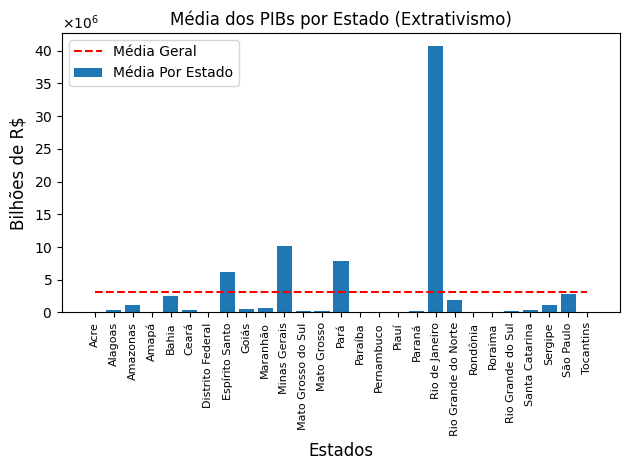

In [13]:
fig, xb = plt.subplots()

xb.bar(pib_extrat_transposed.columns, media_por_estado.values)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6,6))
xb.yaxis.set_major_formatter(formatter)


plt.plot(pib_extrat_transposed.columns, [media_geral for _ in range(len(pib_extrat_transposed.columns))], "r--")
plt.title("Média dos PIBs por Estado (Extrativismo)")
plt.legend(["Média Geral", "Média Por Estado"])

plt.xlabel("Estados", fontsize=12)
plt.ylabel("Bilhões de R$", fontsize=12)

plt.xticks([i for i, _ in enumerate(pib_extrat_transposed.columns)], pib_extrat_transposed.columns, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

Nesse caso, há uma discrepância ainda maior nos dados das produções do estado. Considerando que a economia extrativista é ainda mais restrita à localidades específicas e que o Rio de Janeiro possui uma economia petrolífera muito forte, ainda pode não representar um erro. Entretanto, como a diferença é muito grande, esse é um ponto de atenção.

Essa discrepância, mesmo que não seja um problema para o domínio, será um problema para a plotagem, como o gráfico acima mostra.

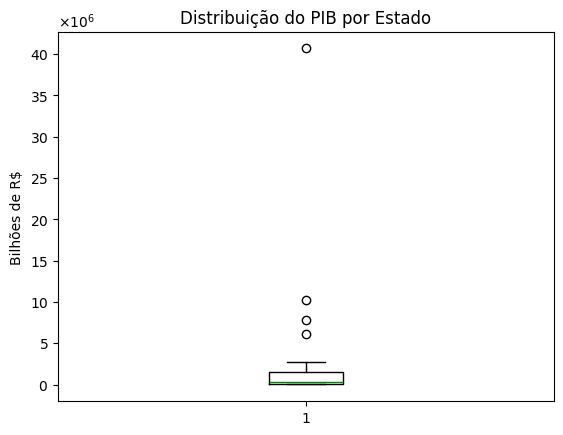

In [14]:
# Box plot para confirmar a distribuição
_, xb = plt.subplots()
xb.yaxis.set_major_formatter(formatter)
xb.boxplot(media_por_estado, medianprops={ "color": "green", "linewidth": 1 })
plt.title("Distribuição do PIB por Estado")
xb.set_ylabel("Bilhões de R$")
plt.show()

O Boxplot demonstra que há uma concentração de valores de PIB extrativista abaixo dos 5 Bilhões e que a quantidade de outliers, apesar de um extremamente discrepante, não é alta. Essa discrepância provavelmente está realmente relacionada às características econômicas específicas de cada estado.

Entre os estados, a discrepância de valores se justifica pelas especificidades econômicas de cada um, o tamanho de suas populações e a quantidade de centros urbanos. Tendo isso verificado, vale a pena observar os valores dos estados entre os anos para verificar se não há dados discrepantes entre os anos.

In [15]:
quartis = pib_extrat_transposed.quantile([0.25, 0.5, 0.75]) # Os NaNs serão automaticamente ignorados

interquartil = quartis.loc[0.75] - quartis.loc[0.25]
outlier_upper_limit = quartis.loc[0.75] + 1.5 * interquartil
outlier_bottom_limit = quartis.loc[0.25] - 1.5 * interquartil

pib_years_data = pib_extrat_transposed.transpose()

pib_years_data['Outlier Upper Limit'] = outlier_upper_limit
pib_years_data['Outlier Bottom Limit'] = outlier_bottom_limit

rounded_years_data = pib_years_data.copy()

for i in rounded_years_data:
    rounded_years_data[i] = round(rounded_years_data[i] / 1e6, 2)

rounded_years_data

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,Outlier Upper Limit,Outlier Bottom Limit
Ano,,,,,,,,,,,,,,,,,,,,,
Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.02,-0.01
Alagoas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.19,0.07,0.09,0.12,0.13,0.09,0.17,0.30,1.07,-0.36
Amazonas,1.46,0.34,0.43,0.30,0.34,0.10,0.06,0.06,0.06,0.39,...,1.02,0.21,0.27,0.81,0.91,0.62,1.19,1.58,3.40,-1.47
Amapá,0.11,0.10,0.09,0.11,0.13,0.13,0.10,0.10,0.11,0.02,...,0.02,0.02,0.02,0.01,0.00,0.01,0.00,-0.01,0.25,-0.12
Bahia,2.56,2.17,2.38,2.45,2.83,2.36,1.63,1.37,1.31,1.23,...,1.75,0.81,1.26,1.93,1.71,1.53,2.69,2.79,4.97,-0.34
Ceará,0.60,0.55,0.66,0.70,0.69,0.57,0.38,0.34,0.36,0.35,...,0.23,0.12,0.22,0.25,0.24,0.15,0.26,0.14,0.78,0.07
Distrito Federal,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.02,0.01,0.01,0.01,0.01,0.02,0.02,0.03,-0.00
Espírito Santo,0.49,0.42,0.51,0.45,0.52,0.46,0.33,0.32,0.33,0.38,...,8.95,2.84,3.54,10.13,6.38,5.94,13.55,7.68,21.44,-12.07
Goiás,0.04,0.05,0.09,0.12,0.20,0.20,0.10,0.08,0.11,0.08,...,0.72,0.43,0.62,0.78,0.73,0.66,0.98,0.45,1.72,-0.82


In [16]:
std_frame = pd.DataFrame(columns=["Estado", "Desvio Padrão (bilhões)"], data=[])
std_frame["Estado"] = pib_extrat_transposed.columns
std_series = (pib_extrat_transposed.std() / 1e6).astype('float64').round(2)
std_frame["Desvio Padrão (bilhões)"] = std_series.values
std_frame


,Estado,Desvio Padrão (bilhões)
0,Acre,0.01
1,Alagoas,0.26
2,Amazonas,0.77
3,Amapá,0.06
4,Bahia,1.07
5,Ceará,0.15
6,Distrito Federal,0.03
7,Espírito Santo,6.53
8,Goiás,0.42
9,Maranhão,0.40


Existem estados que possuem um desvio padrão que não é despresível, como Pará ou Minas Gerais, que podem apresentar outliers. Entretanto, entre eles há um valor que chama a atenção: Rio de Janeiro, que possui um desvio padrão acima de 28, indicando fortemente que há uma distribuição bastante desigual de seus valores e com muitos possíveis outliers.

In [17]:
upper_outlier_matrix = pib_extrat_transposed > pib_years_data['Outlier Upper Limit']
upper_outlier_mask = pib_extrat_transposed.where(upper_outlier_matrix, axis=0)

upper_outliers = upper_outlier_mask.stack()
upper_outliers

limits_list = pib_years_data.loc[[index[1] for index in upper_outliers.index], 'Outlier Upper Limit']

upper_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(upper_outliers.index, upper_outliers.values, limits_list)]
upper_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "PIB (bilhões)", "Upper Limit (bilhões)"], data=upper_outlier_data)
upper_outlier_frame["PIB (bilhões)"] = round(upper_outlier_frame["PIB (bilhões)"] / 1e6, 2)
upper_outlier_frame["Upper Limit (bilhões)"] = round(upper_outlier_frame["Upper Limit (bilhões)"] / 1e6, 2)
upper_outlier_frame 


,Ano,Estado,PIB (bilhões),Upper Limit (bilhões)
0,1991,Pernambuco,0.15,0.12
1,1993,Rondônia,0.19,0.17
2,2001,Sergipe,2.86,2.73
3,2003,Distrito Federal,0.09,0.03
4,2004,Distrito Federal,0.10,0.03
5,2005,Distrito Federal,0.11,0.03
6,2007,Acre,0.03,0.02
7,2007,Alagoas,1.07,1.07
8,2007,Roraima,0.03,0.02
9,2008,Acre,0.03,0.02


In [18]:
bottom_outlier_matrix = pib_extrat_transposed < pib_years_data['Outlier Bottom Limit']
bottom_outlier_mask = pib_extrat_transposed.where(bottom_outlier_matrix, axis=0)

bottom_outliers = bottom_outlier_mask.stack()
bottom_outliers

limits_list = pib_years_data.loc[[index[1] for index in bottom_outliers.index], 'Outlier Bottom Limit']

bottom_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(bottom_outliers.index, bottom_outliers.values, limits_list)]
bottom_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "PIB (bilhões)", "Bottom Limit (bilhões)"], data=bottom_outlier_data)
bottom_outlier_frame["PIB (bilhões)"] = round(bottom_outlier_frame["PIB (bilhões)"] / 1e6, 2)
bottom_outlier_frame["Bottom Limit (bilhões)"] = round(bottom_outlier_frame["Bottom Limit (bilhões)"] / 1e6, 2)
bottom_outlier_frame 

,Ano,Estado,PIB (bilhões),Bottom Limit (bilhões)
0,2004,Roraima,-0.01,-0.0


Alguns dados de PIB são negativos, o que não necessáriamente indica um problema. Em casos como esse (quando o PIB calculado é o PIB real), isso pode indicar que houve uma retração da produção e/ou circulação dos produtos. 

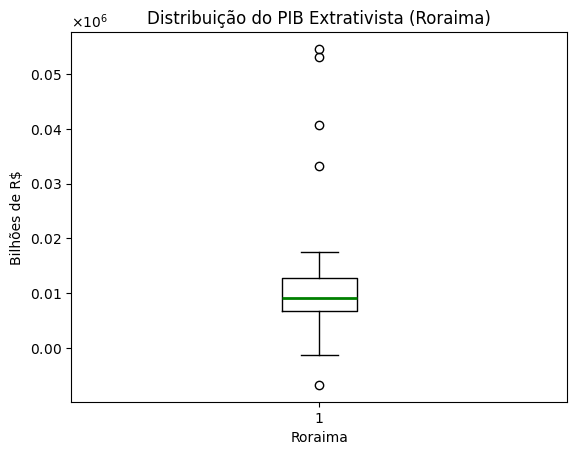

In [19]:
# Gerar pelo menos 1 box plot pra comprovar os outliers
_, xb = plt.subplots()
# A partir de 2002, quando os valores não são NaN
xb.boxplot(pib_extrat_transposed.loc[2002:, 'Roraima'], medianprops={"color": "g", "linewidth": 2})

xb.yaxis.set_major_formatter(formatter)

xb.set_ylabel("Bilhões de R$")
xb.set_xlabel("Roraima")

plt.title("Distribuição do PIB Extrativista (Roraima)")
plt.show()

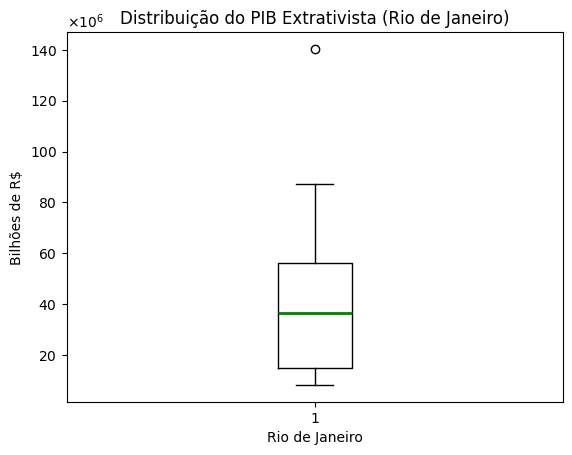

In [20]:
# Gerar pelo menos 1 box plot pra comprovar os outliers
_, xb = plt.subplots()
# A partir de 2002, quando os valores não são NaN
xb.boxplot(pib_extrat_transposed['Rio de Janeiro'], medianprops={"color": "g", "linewidth": 2})

xb.yaxis.set_major_formatter(formatter)

xb.set_ylabel("Bilhões de R$")
xb.set_xlabel("Rio de Janeiro")

plt.title("Distribuição do PIB Extrativista (Rio de Janeiro)")
plt.show()

Dado o desvio padrão incomum e a distribuição dos dados apresentadas no boxplot, que não convence para um desvio padrão tão alto, os dados do Rio de Janeiro serão observados com mais atenção através dos anos.

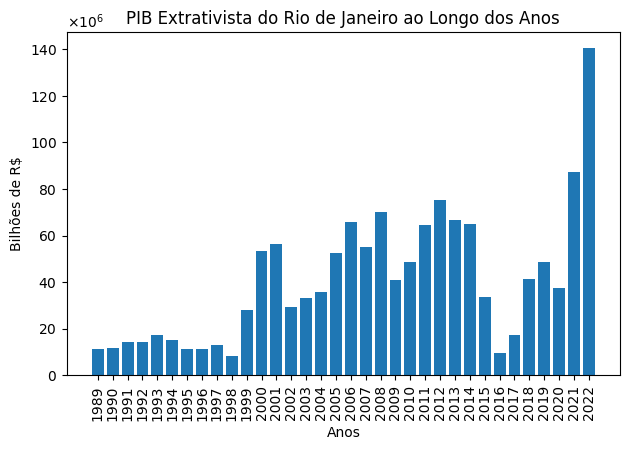

In [21]:
_, xb = plt.subplots()

xb.yaxis.set_major_formatter(formatter)
xb.bar(x=pib_extrat_transposed.index, height=pib_extrat_transposed['Rio de Janeiro'])

xb.set_xlabel("Anos")
xb.set_ylabel("Bilhões de R$")

plt.title("PIB Extrativista do Rio de Janeiro ao Longo dos Anos")
plt.xticks(ticks=[j for _, j in enumerate(pib_extrat_transposed.index)], labels=pib_extrat_transposed.index, rotation=90)
plt.tight_layout()
plt.show()

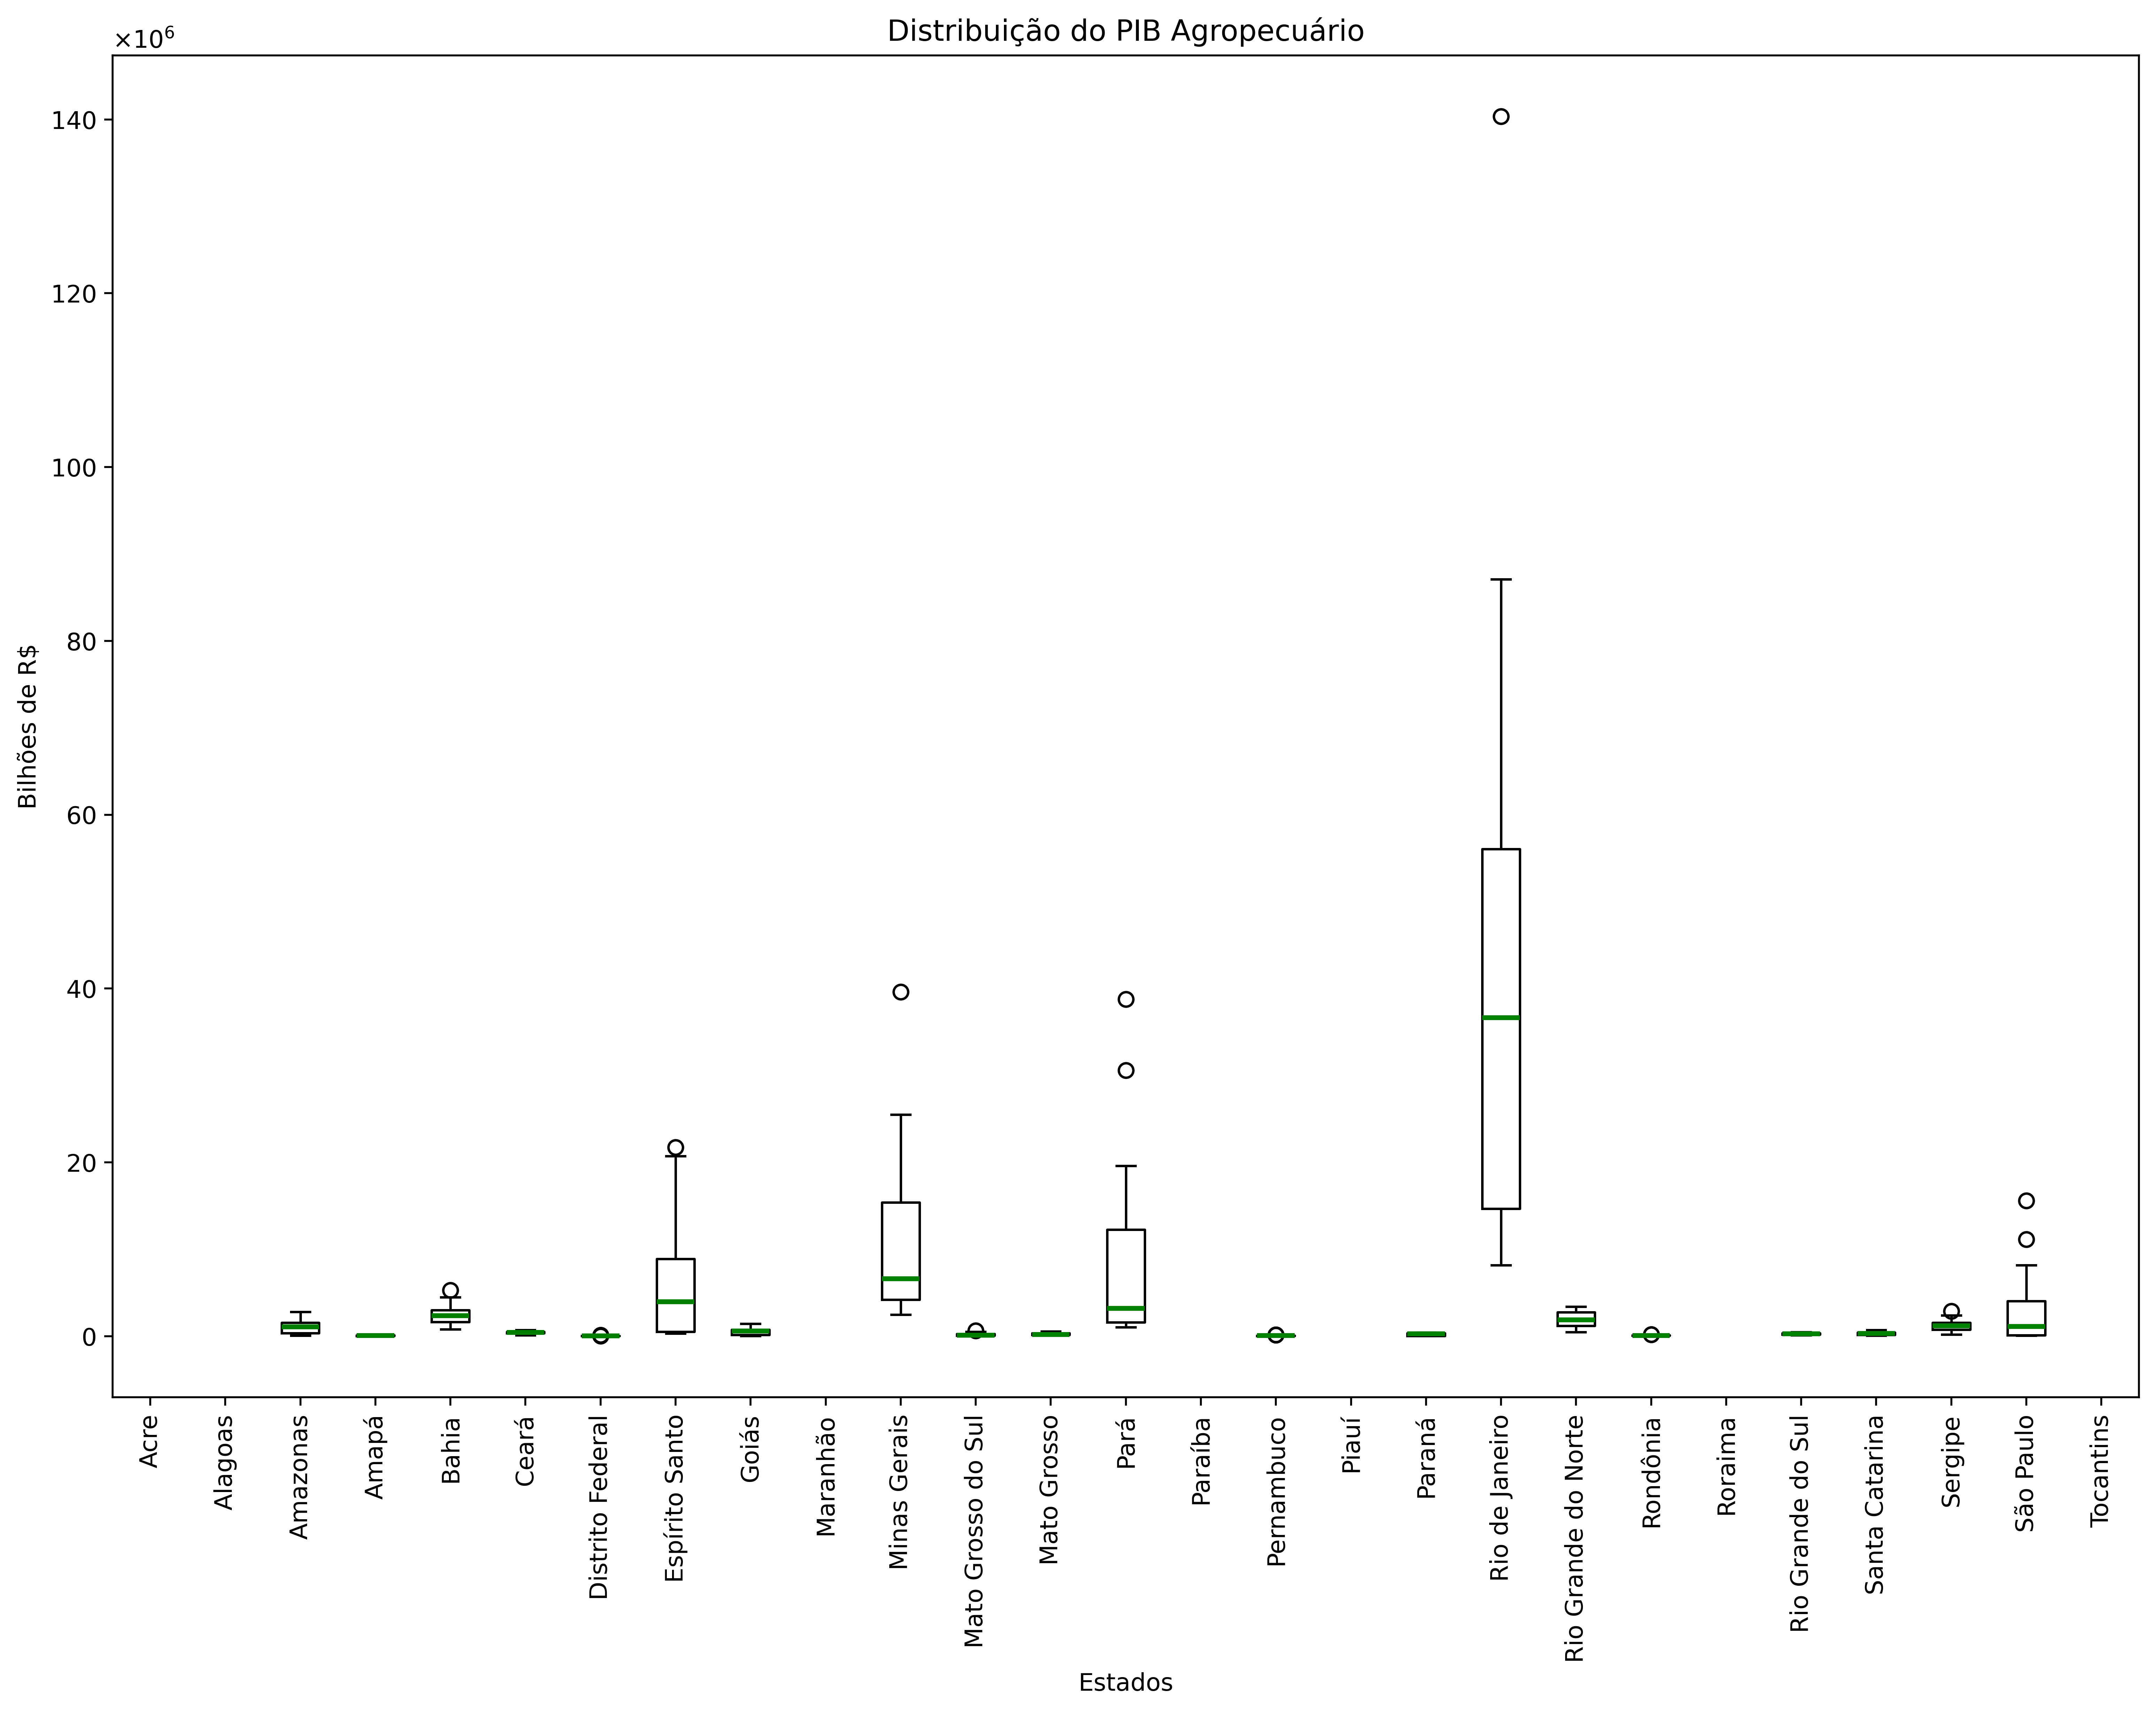

In [22]:
plt.figure(figsize=(15, 10), dpi=500)

plt.boxplot(pib_extrat_transposed, medianprops={"color": "g", "linewidth": 2})

plt.ticklabel_format(axis='y', useMathText=True, scilimits=(6, 6))
plt.ylabel("Bilhões de R$")
plt.xlabel("Estados")

plt.xticks([i + 1 for i, _ in enumerate(pib_extrat_transposed.columns)], pib_extrat_transposed.columns, rotation=90)



plt.title("Distribuição do PIB Agropecuário")
plt.show()